<a href="https://colab.research.google.com/github/Khushi-0/LGMVIP-DataScience/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

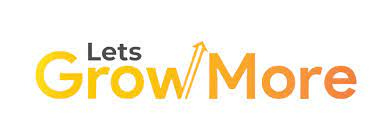

### LetsGrowMore Internship January-2023 Batch
**Author - Khushi Koladiya**

## **Prediction Using Decision Tree Algorithm for Iris Dataset**

### **Dataset**  
http://archive.ics.uci.edu/ml/datasets/Iris

## **Import libraries**

In [1]:
# import required libraries
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Step 1: Load Iris Dataset**

In [19]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
iris_df = pd.read_csv('iris.data', names=columns)
iris_df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **Step 2: Analyze and Visualize the Dataset**

In [20]:
iris_df.isnull().any()

Sepal length    False
Sepal width     False
Petal length    False
Petal width     False
Class_labels    False
dtype: bool

In [21]:
iris_df.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object

In [22]:
iris_df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Perform pair plotting to view relationship between the features present in the data**

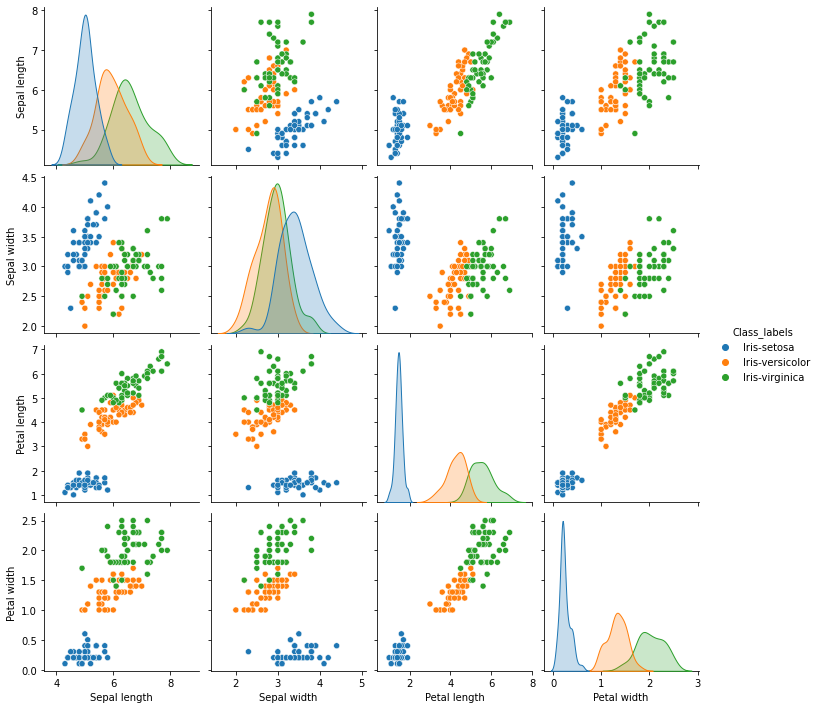

In [23]:
sns.pairplot(iris_df, hue='Class_labels')

## **Step 3: Splitting Data into Training and Testing**

In [24]:
X = iris_df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']].values
y = iris_df['Class_labels'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## **Step 4: Train the Decision Tree Classifier**

In [25]:
#scikit learn decision tree model training 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)  

## **Step 5: Test the Trained Model**

In [26]:
prediction = clf.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

## **Perform Model Evaluation on Test set**

In [27]:
# evaluation for multi class classification
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## **Plot Confusion Matrix**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


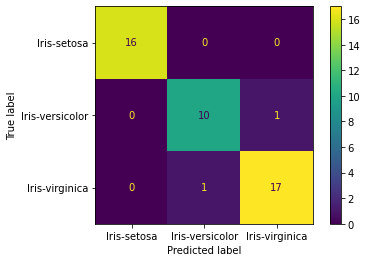

In [28]:
plot_confusion_matrix(clf, X_test, y_test)

## **Step 6: Visualize the Decision Tree**

In [29]:
# Install required libraries
!pip3 install pydotplus
!pip3 install graphviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


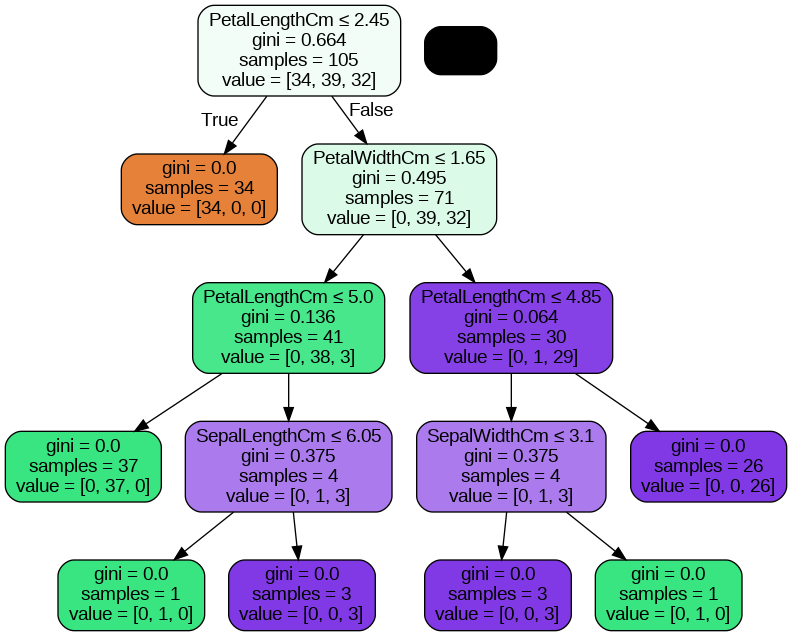

In [30]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## **Feeding New Data to the Classifier to Predict the Right Class**

In [37]:
SepalLengthCm = 6.2
SepalWidthCm = 2.1
PetalLengthCm = 4.1
PetalWidthCm = 1.4

In [38]:
X = [[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]]

res = clf.predict(X)

In [39]:
print("The class predicted is --> " + str(*res))

The class predicted is --> Iris-versicolor
